In [1]:
import pandas as pd
import numpy as np
import pickle
from scipy.stats import pearsonr
import scipy as sp
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from random import sample
import random
import csv
import scipy
from sklearn import preprocessing
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import box
import matplotlib.patches as patches
import random
from shapely.geometry import Point
from copy import copy
from shapely.ops import unary_union
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("spherical.csv")
df

,Unnamed: 0,pickup_hour,pickup_weekday,speed,cluster
0,0,17,1,17.473990,2
1,1,19,3,13.699215,0
2,2,22,6,14.717902,0
3,3,23,5,29.913317,2
4,4,21,4,17.483443,0
...,...,...,...,...,...
872707,210155,22,6,13.597378,0
872708,210156,18,2,12.175659,0
872709,210157,19,6,27.485281,1
872710,210158,14,3,16.862383,2


In [3]:
#Create column that combines the pickup hour and day
news = df[['pickup_hour', 'pickup_weekday', 'speed', 'cluster']].copy()
news['date'] = news['pickup_hour']/24 + news['pickup_weekday']
news

,pickup_hour,pickup_weekday,speed,cluster,date
0,17,1,17.473990,2,1.708333
1,19,3,13.699215,0,3.791667
2,22,6,14.717902,0,6.916667
3,23,5,29.913317,2,5.958333
4,21,4,17.483443,0,4.875000
...,...,...,...,...,...
872707,22,6,13.597378,0,6.916667
872708,18,2,12.175659,0,2.750000
872709,19,6,27.485281,1,6.791667
872710,14,3,16.862383,2,3.583333


In [4]:
data0 = news[news.cluster==0]
data1 = news[news.cluster==1]
data2 = news[news.cluster==2]
data3 = news[news.cluster==3]
data4 = news[news.cluster==4]
alld = [data0, data1, data2, data3, data4]

In [25]:
data2.std()

pickup_hour       4.124556e+00
pickup_weekday    1.435568e+00
speed             5.661970e+00
cluster           2.220452e-16
date              1.512093e+00
dtype: float64

In [26]:
data3.std()

pickup_hour       3.063979e+00
pickup_weekday    1.988848e+00
speed             9.428678e+00
cluster           4.440910e-16
date              1.969532e+00
dtype: float64

In [28]:
data0.std()

pickup_hour       3.077852
pickup_weekday    1.797351
speed             2.879669
cluster           0.000000
date              1.821766
dtype: float64

In [27]:
data1.std()

pickup_hour       4.045361
pickup_weekday    1.192307
speed             5.137406
cluster           0.000000
date              1.292918
dtype: float64

In [29]:
data4.std()

pickup_hour       4.873885
pickup_weekday    2.009550
speed             9.084057
cluster           0.000000
date              2.045153
dtype: float64

In [16]:
data1.max()

pickup_hour       24.000000
pickup_weekday     7.000000
speed             36.983433
cluster            1.000000
date               8.000000
dtype: float64

In [20]:
data3.min()

pickup_hour       1.000000
pickup_weekday    1.000000
speed             9.767362
cluster           3.000000
date              1.041667
dtype: float64

In [21]:
data3.max()

pickup_hour       19.000000
pickup_weekday     7.000000
speed             70.726645
cluster            3.000000
date               7.791667
dtype: float64

In [22]:
data4.min()

pickup_hour        4.000000
pickup_weekday     1.000000
speed             10.015058
cluster            4.000000
date               1.166667
dtype: float64

In [23]:
data4.max()

pickup_hour       24.000000
pickup_weekday     7.000000
speed             70.726645
cluster            4.000000
date               8.000000
dtype: float64

In [5]:
#create mean, standard dev, min, max, and difference of min max for each cluster 
mean_date_0 = data0["date"].mean()
std_date_0 = data0['date'].std() 
min_date_0 = mean_date_0 - std_date_0
max_date_0 = mean_date_0 + std_date_0
diff0 = max_date_0-min_date_0
print(min_date_0, max_date_0, diff0)

3.1505335559297927 6.794064593489685 3.643531037559892


In [6]:
mean_date_1 = data1["date"].mean()
std_date_1 = data1['date'].std() 
min_date_1 = mean_date_1 - std_date_1
max_date_1 = mean_date_1 + std_date_1
diff1 = max_date_1-min_date_1
print(min_date_1, max_date_1, diff1)

5.00186151660211 7.587697614327382 2.585836097725272


In [7]:
mean_date_2 = data2["date"].mean()
std_date_2 = data2['date'].std() 
min_date_2 = mean_date_2 - std_date_2
max_date_2 = mean_date_2 + std_date_2
diff2 = max_date_2-min_date_2
print(min_date_2, max_date_2, diff2)

1.9337379317896985 4.9579245649092565 3.024186633119558


In [8]:
mean_date_3 = data3["date"].mean()
std_date_3 = data3['date'].std() 
min_date_3 = mean_date_3 - std_date_3
max_date_3 = mean_date_3 + std_date_3
diff3 = max_date_3-min_date_3
print(min_date_3, max_date_3, diff3)

2.888943400795637 6.828007955792972 3.9390645549973353


In [9]:
mean_date_4 = data4["date"].mean()
std_date_4 = data4['date'].std() 
min_date_4 = mean_date_4 - std_date_4
max_date_4 = mean_date_4 + std_date_4
diff4 = max_date_4-min_date_4
print(min_date_4, max_date_4, diff4)

2.3496095902369505 6.439915429749258 4.0903058395123075


In [10]:
#ratio of differences
totaldiff = diff0+diff1+diff2+diff3+diff4
realdiff0 = diff0/totaldiff*7
realdiff1 = diff1/totaldiff*7
realdiff2 = diff2/totaldiff*7
realdiff3 = diff3/totaldiff*7
realdiff4 = diff4/totaldiff*7
print(realdiff0, realdiff1, realdiff2, realdiff3, realdiff4)

1.475717709717617 1.0473258178681157 1.2248683285471986 1.5954158928816202 1.6566722509854495


C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


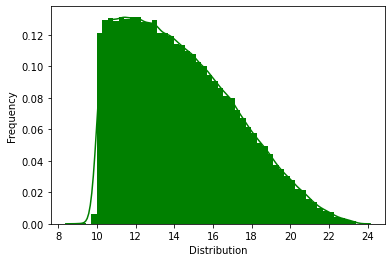

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


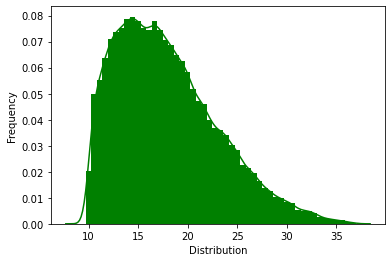

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


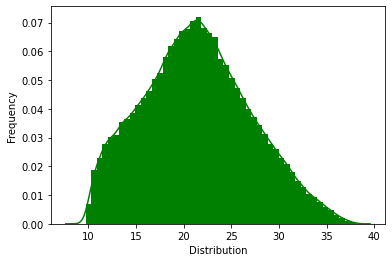

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


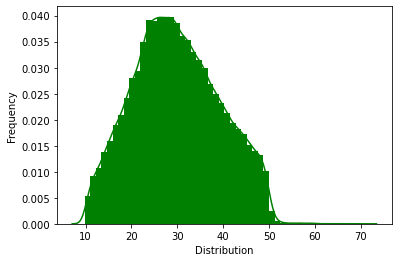

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


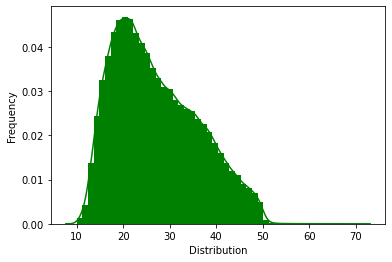

In [11]:
#find the distributio nof each cluster
for i in range(5):
    ax = sns.distplot(alld[i]['speed'],
                  bins=50,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
    ax.set(xlabel='Distribution', ylabel='Frequency')
 
    plt.show()

2.8934760735996212
9.124032820868688
1.789435908185725


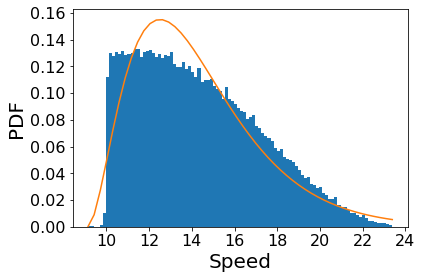

2.6244628044408014
9.129997648099465
3.345580384407855


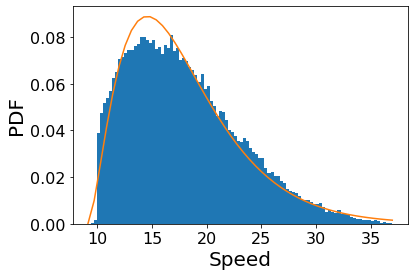

32.17280584026627
-10.87404708690056
1.0027629404654488


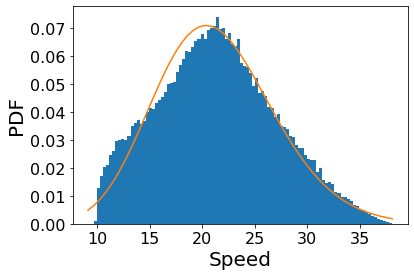

54.305406039598864
-39.59840677224676
1.2801738389065083


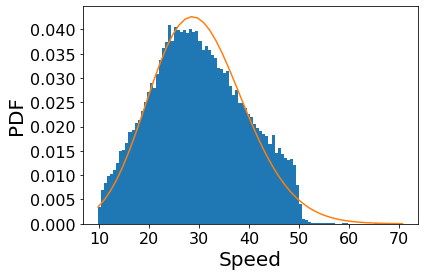

3.5274268749799393
9.301537686203494
5.05641019989269


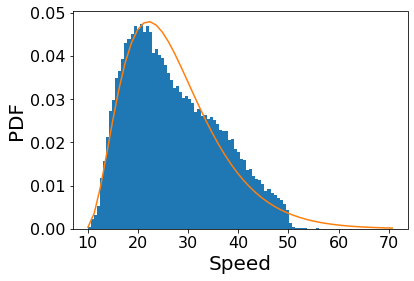

In [12]:
#fit gamma distribution
number = ['a', 'b', 'c', 'd', 'e']
poisson = []
for i in range(5):
    plt.hist(alld[i]['speed'], bins=100, density=True)
    [a_fit, loc_fit, scale_fit]=scipy.stats.gamma.fit(alld[i]['speed'])
    print(a_fit)
    print(loc_fit)
    print(scale_fit)
    x = np.linspace(np.min(alld[i]['speed']), np.max(alld[i]['speed']))

    plt.plot(x, scipy.stats.gamma.pdf(x, a_fit, loc=loc_fit, scale=scale_fit),)

    plt.xlabel("Speed", fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel("PDF", fontsize = 20)
    plt.yticks(fontsize = 16)
    plt.show()
    r = sp.stats.gamma.rvs(a=[a_fit, loc_fit, scale_fit][0], loc=[a_fit, loc_fit, scale_fit][1], scale=[a_fit, loc_fit, scale_fit][2],size=(1000))
    poisson.append(r)
    pickle.dump( [a_fit, loc_fit, scale_fit], open('test_model' + number[i] + '.pkl', 'wb'))

3.5274268749799393
14.301727264164718
2.87966180346127


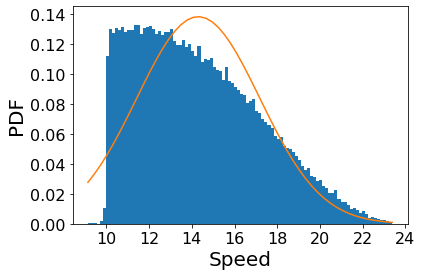

3.5274268749799393
17.910391905014766
5.137387836073666


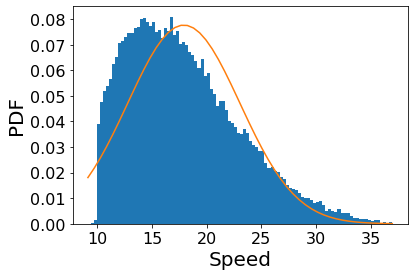

3.5274268749799393
21.38764996760383
5.661954750596316


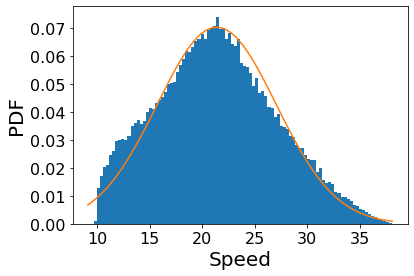

3.5274268749799393
29.91290606716212
9.428640967493356


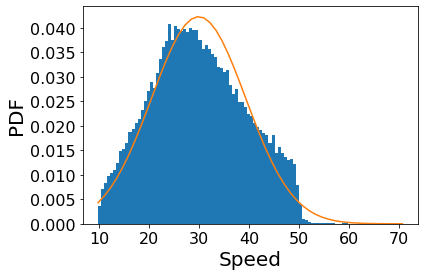

3.5274268749799393
27.137669290324418
9.084035404806903


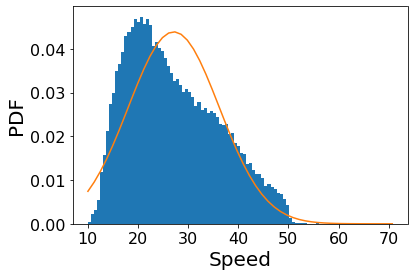

In [13]:
#fit normal distribution
normal = []
for i in range(5):
    plt.hist(alld[i]['speed'], bins=100, density=True)
    [loc_fit, scale_fit]=scipy.stats.norm.fit(alld[i]['speed'])
    print(a_fit)
    print(loc_fit)
    print(scale_fit)
    x = np.linspace(np.min(alld[i]['speed']), np.max(alld[i]['speed']))

    plt.plot(x, scipy.stats.norm.pdf(x, loc=loc_fit, scale=scale_fit),)

    plt.xlabel("Speed", fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel("PDF", fontsize = 20)
    plt.yticks(fontsize = 16)
    plt.show()
    r = sp.stats.norm.rvs(loc=[loc_fit, scale_fit][0], scale=[loc_fit, scale_fit][1],size=(1000))
    normal.append(r)
    pickle.dump( [a_fit, loc_fit, scale_fit], open('test_model_norm' + number[i] + '.pkl', 'wb'))

In [68]:
#seperate poisson dist
PoissonDist = []
for i in range(5):
    PoissonDist.append(pd.DataFrame(poisson[i]))
PoissonDist

[             0
 0    15.018658
 1    15.209852
 2    16.975089
 3    16.514218
 4    16.517321
 ..         ...
 995  15.180607
 996  13.385239
 997  11.070787
 998  12.959168
 999  15.524437
 
 [1000 rows x 1 columns],
              0
 0    28.890691
 1    21.249291
 2    19.904645
 3    13.365065
 4    23.615603
 ..         ...
 995  18.033690
 996  26.336717
 997  27.834451
 998  25.259848
 999  18.783008
 
 [1000 rows x 1 columns],
              0
 0    23.188427
 1    10.507600
 2     8.735363
 3    22.713437
 4    21.146878
 ..         ...
 995  24.486603
 996  27.065855
 997  18.616905
 998  14.386613
 999  21.800239
 
 [1000 rows x 1 columns],
              0
 0    26.682825
 1    20.595960
 2    28.575700
 3    13.494984
 4    30.138847
 ..         ...
 995  32.248826
 996  33.376088
 997  18.081731
 998  54.421815
 999  29.611064
 
 [1000 rows x 1 columns],
              0
 0    25.432408
 1    16.933059
 2    41.700275
 3    25.176045
 4    35.077734
 ..         ...
 995  31

In [70]:
#seperate normal dist
NormDist = []
for i in range(5):
    NormDist.append(pd.DataFrame(poisson[i]))
NormDist

[             0
 0    15.018658
 1    15.209852
 2    16.975089
 3    16.514218
 4    16.517321
 ..         ...
 995  15.180607
 996  13.385239
 997  11.070787
 998  12.959168
 999  15.524437
 
 [1000 rows x 1 columns],
              0
 0    28.890691
 1    21.249291
 2    19.904645
 3    13.365065
 4    23.615603
 ..         ...
 995  18.033690
 996  26.336717
 997  27.834451
 998  25.259848
 999  18.783008
 
 [1000 rows x 1 columns],
              0
 0    23.188427
 1    10.507600
 2     8.735363
 3    22.713437
 4    21.146878
 ..         ...
 995  24.486603
 996  27.065855
 997  18.616905
 998  14.386613
 999  21.800239
 
 [1000 rows x 1 columns],
              0
 0    26.682825
 1    20.595960
 2    28.575700
 3    13.494984
 4    30.138847
 ..         ...
 995  32.248826
 996  33.376088
 997  18.081731
 998  54.421815
 999  29.611064
 
 [1000 rows x 1 columns],
              0
 0    25.432408
 1    16.933059
 2    41.700275
 3    25.176045
 4    35.077734
 ..         ...
 995  31

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


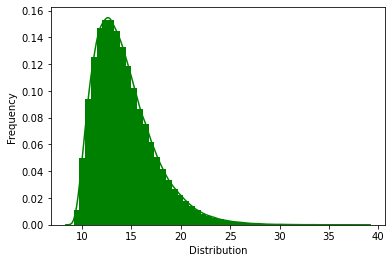

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


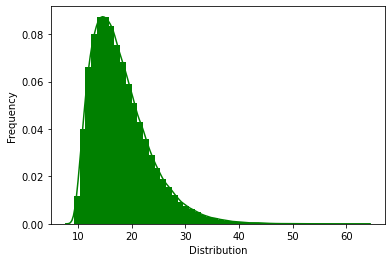

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


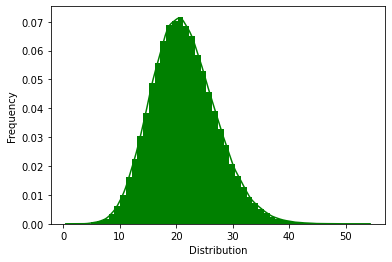

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


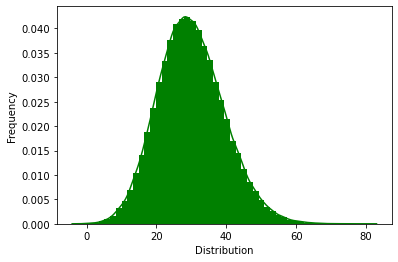

C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


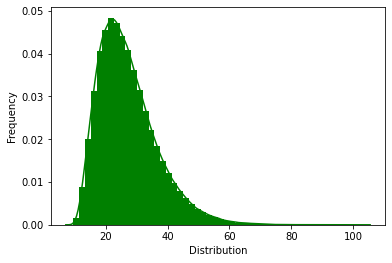

In [57]:
#shows the distribution of chosen models
for i in range(5):
    ax = sns.distplot(E[i],
                  bins=50,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
    ax.set(xlabel='Distribution', ylabel='Frequency')
 
    plt.show()

In [23]:
#fit with gamma function
k = len([a_fit, loc_fit, scale_fit])
for i in range(5):
    logLik = np.sum(sp.stats.gamma.logpdf(alld[i]['speed'], [a_fit, loc_fit, scale_fit][0], loc=[a_fit, loc_fit, scale_fit][1], scale=[a_fit, loc_fit, scale_fit][2]) ) 
    aic = 2*k - 2*(logLik)
    print(aic)

1742100.2210249635
1033183.3969350735
1312604.2060433934
941303.5016828335
1497257.6422722172


C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\scipy\stats\_continuous_distns.py:3734: RuntimeWarning: divide by zero encountered in true_divide
  return -0.5*np.log(2*np.pi) - 1.5*np.log(x) - ((x-mu)/mu)**2/(2*x)
C:\Users\GI Maximus\anaconda3\envs\advance_ml\lib\site-packages\scipy\stats\_distn_infrastructure.py:2237: RuntimeWarning: divide by zero encountered in true_divide
  x = asarray((x-loc) / scale)


8.09799998512387
1.0499999999999998


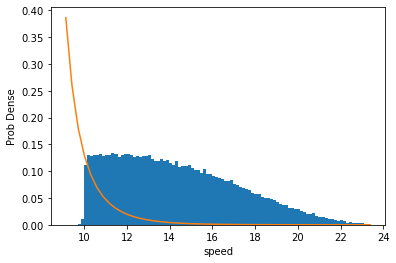

9.088214655122151
10.287173848635645


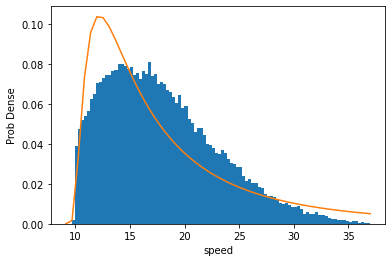

9.06997157496537
15.395376586764497


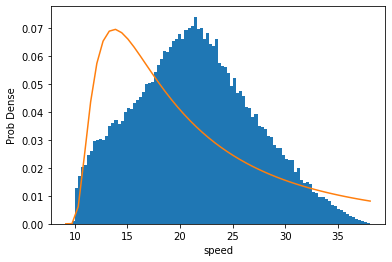

8.795743398225184
26.703334557291598


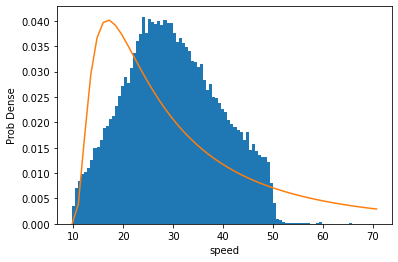

9.299584505438188
22.798917508125285


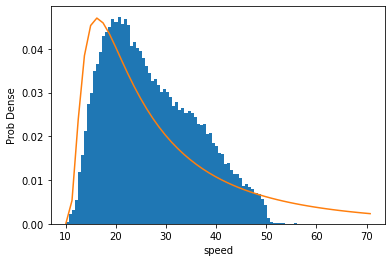

In [29]:
#fit with wald function
for i in range(5):
    plt.hist(alld[i]['speed'], bins=100, density=True)
    [loc_fit, scale_fit]=scipy.stats.wald.fit(alld[i]['speed'])
    print(loc_fit)
    print(scale_fit)
    x = np.linspace(np.min(alld[i]['speed']), np.max(alld[i]['speed']))
    plt.plot(x, scipy.stats.wald.pdf(x, loc=loc_fit, scale=scale_fit),)
    plt.xlabel("speed")
    plt.ylabel("Prob Dense")
    plt.show()

In [33]:
for i in range(5):
    logLik = np.sum(sp.stats.wald.logpdf(alld[i]['speed'], loc=[loc_fit, scale_fit][0], scale=[loc_fit, scale_fit][1]) ) 
    aic = 2*k - 2*(logLik)
    print(aic)


inf
inf
inf
1002516.1619935979
1561711.1080641495


In [ ]:
pickle.dump()